In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sentence_transformers import SentenceTransformer, util

print("✅ Milestone 3 imports loaded")


✅ Milestone 3 imports loaded


In [11]:
resume_skills = [
    'python', 'sql',
    'communication'
]

jd_skills = [
    'machine learning', 'data visualization', 'gcp', 'python', 'sql', 'aws', 'azure'
]


In [12]:
resume_skills = list(set(skill.lower().strip() for skill in resume_skills))
jd_skills = list(set(skill.lower().strip() for skill in jd_skills))

resume_skills, jd_skills


(['python', 'sql', 'communication'],
 ['sql',
  'aws',
  'data visualization',
  'gcp',
  'azure',
  'python',
  'machine learning'])

In [13]:
bert_model = SentenceTransformer("all-MiniLM-L6-v2")
print("✅ BERT model loaded for similarity matching")


✅ BERT model loaded for similarity matching


In [14]:
resume_embeddings = bert_model.encode(resume_skills)
jd_embeddings = bert_model.encode(jd_skills)


In [15]:
similarity_matrix = util.cos_sim(resume_embeddings, jd_embeddings).numpy()

similarity_df = pd.DataFrame(
    similarity_matrix,
    index=resume_skills,
    columns=jd_skills
)

similarity_df


,sql,aws,data visualization,gcp,azure,python,machine learning
python,0.299984,0.255030,0.246242,0.200826,0.181723,1.000000,0.361327
sql,1.000000,0.231155,0.290032,0.139348,0.239767,0.299984,0.316897
communication,0.222640,0.237989,0.168266,0.153101,0.170835,0.220291,0.279096


In [16]:
MATCH_THRESHOLD = 0.75
PARTIAL_THRESHOLD = 0.5

matched_skills = []
partial_skills = []
missing_skills = []

for jd_skill in similarity_df.columns:
    best_score = similarity_df[jd_skill].max()
    best_resume_skill = similarity_df[jd_skill].idxmax()

    if best_score >= MATCH_THRESHOLD:
        matched_skills.append(jd_skill)
    elif best_score >= PARTIAL_THRESHOLD:
        partial_skills.append(jd_skill)
    else:
        missing_skills.append(jd_skill)

matched_skills, partial_skills, missing_skills


(['sql', 'python'],
 [],
 ['aws', 'data visualization', 'gcp', 'azure', 'machine learning'])

In [17]:
total_skills = len(jd_skills)

overall_match_percentage = round((len(matched_skills) / total_skills) * 100, 2)

print("Overall Match Percentage:", overall_match_percentage, "%")
print("Matched Skills:", len(matched_skills))
print("Partial Matches:", len(partial_skills))
print("Missing Skills:", len(missing_skills))


Overall Match Percentage: 28.57 %
Matched Skills: 2
Partial Matches: 0
Missing Skills: 5


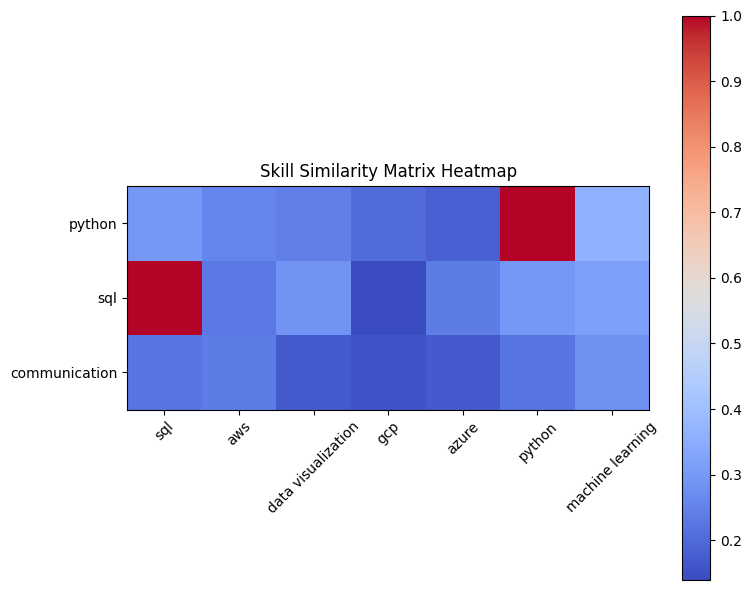

In [18]:
plt.figure(figsize=(8,6))
plt.imshow(similarity_df.values, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(jd_skills)), jd_skills, rotation=45)
plt.yticks(range(len(resume_skills)), resume_skills)
plt.title("Skill Similarity Matrix Heatmap")
plt.tight_layout()
plt.show()


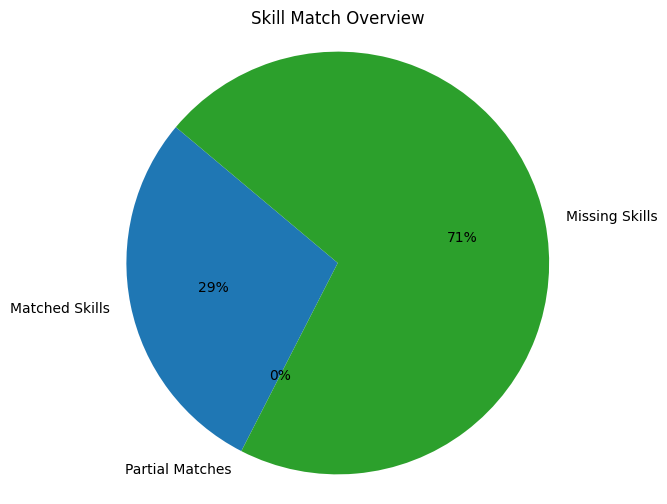

In [19]:
labels = ['Matched Skills', 'Partial Matches', 'Missing Skills']
sizes = [
    len(matched_skills),
    len(partial_skills),
    len(missing_skills)
]

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.0f%%',
    startangle=140
)
plt.title("Skill Match Overview")
plt.axis('equal')  # Makes pie circular
plt.show()


In [20]:
print("❌ Missing Skills (Not Found in Resume):\n")

for skill in missing_skills:
    print("•", skill.upper())


❌ Missing Skills (Not Found in Resume):

• AWS
• DATA VISUALIZATION
• GCP
• AZURE
• MACHINE LEARNING


In [21]:
skill_gap_report = {
    "Matched Skills": matched_skills,
    "Partial Matches": partial_skills,
    "Missing Skills": missing_skills
}

pd.DataFrame(dict([(k, pd.Series(v)) for k, v in skill_gap_report.items()]))


,Matched Skills,Partial Matches,Missing Skills
0,sql,NaN,aws
1,python,NaN,data visualization
2,NaN,NaN,gcp
3,NaN,NaN,azure
4,NaN,NaN,machine learning
